[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mcwg/calc-python-labs/blob/main/Lab8-Symbolic-Integration.ipynb)


<a name="title"></a>

# Lab 8: Symbolic Integration and the Fundamental Theorem of Calculus

---

The [SymPy library](https://www.sympy.org/en/index.html) is the most popular Python library for symbolic mathematics. In [Lab 6](https://githubtocolab.com/mcwg/calc-python-labs/blob/main/Lab6-Optimization.ipynb), we have seen how to perform symbolic differentiation using `diff`, solve algebraic equations with `solve`, evaluate symbolic functions with `evalf`, and simplify algebraic expressions with `simplify`. In this lab, we use built-in SymPy functions to perform symbolic integration to evaluate both indefinite and definite integrals.

<br>

*Note: Recall when calling functions from a library, we can use the syntax `libraryname.functioname()`. If we use the abbreviation `sym` when importing `sympy`, then we can call in functions using `sym` for the library name. For example `sym.simplify()` calls in `simplify()` from the SymPy library.*



# Learning Objectives

---




## Saving Your Work to a Colab Notebook

---

This lab is a shared Colab notebook available for anyone to view. However, since everyone is sharing this notebook, you do not have permission to save changes to this shared Colab notebook. In order to save your work:

1. You will need to set up a free Google Drive account. If you already have a Google Drive account, you are ready to go!
2. Click the `Copy to Drive` button to the right of the `+ Code` and `+ Text` buttons on top of the notebook.
3. Select from the menu `File/Save a Copy in Drive`.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your Drive.
  - Feel free to rename and store the notebook wherever you like.


# Importing Required Libraries

---



In [ ]:
###################################
# Run to import required libraries
###################################
import sympy as sym  # import sympy
import numpy as np  # import numpy
import matplotlib.pyplot as plt  # import matplotlib.pyplot

## How Often Do We Need to Import Libraries?

---

After importing a library for the first time, we can now access functions in the library in any code cell we run, regardless of where the code cell is located in the notebook. Thus, we only need to run `import` commands such as `import numpy as np` or `import pandas as pd` once, and then we can continue calling in functions from those libraries (using specified abbreviations) for as long as the session remains active. If you take a break while working in Colab, your session may *time out* and disconnect.

- We need to import libraries one time after opening a notebook or reconnecting after timing out.
- We do not need to import the library again unless we take a break and the connection times out.


# Integration with SymPy

---

We can perform symbolic integration using the  SymPy function `integrate()`. The `integrate()` function can be used to evaluate both indefinite and definite integrals. Although the notation is similar, conceptually definite and indefinite integrals tell us different information.

- A definite integral $\displaystyle \int_a^b f(x) \, dx$ is a number that is the signed area between the graph of $f$ and the $x$-axis.

- An indefinite integral $\displaystyle \int f(x) \, dx$ is a family of functions that describe all possible antiderivatives of $f(x)$.

The syntax for evaluating definite and indefinite integrals is very similar, but as noted above, the corresponding output is either a number (for a definite integral) or a function (for an indefinite integral).








# Evaluating Definite Integrals with `integrate()`.

---

To evaluate a definite integral

$$\int_a^b f(x) \, dx.$$

We can write code that peforms the following steps:

1. Store the variable $x$ as a SymPy symbol with `x = sym.symbols('x')`.
2. Define the function $f$ with `f = [enter symbolic formula]`.
3. Evaluate the definite integral with either the commands `sym.integrate(f, (x, a, b))` or `f.integrate((x, a, b))`.

For example, to evaluate the definite integral

$$\int_0^3 \left( 9x^2 - 16 \right) \, dx,$$

we can first store `x` as a symbol and define the symbolic function $f$ in the first code cell below.


<br>  

*Note: When we imported packages in the first code cell, we used the abbreviation `sym` for `sympy`. Be sure you have already imported the required packages for this notebook.*

In [ ]:
##################################
# Run code cell to define x and f
##################################
x = sym.symbols('x')  # define x as a symbolic variable
f = 9 * x**2 - 16  # define symbolic function f(x) = 9x^2 - 16
f  # print f to screen

Next, we can use the syntax `sym.integrate(f, (x, a, b))`. Run the code cell and confirm the value of the definite integral is $33$.



In [ ]:
##############################################
# Run code cell to evaluate definite integral
##############################################
sym.integrate(f, (x, 0, 3))  # evaluate definite integral

Equivalently, we can use the syntax `f.integrate((x, a, b))`. Run the code cell and confirm again the value of the definite integral is $33$.

<br>  

*Note: We use two sets of parentheses. One set calls in the `integrate()` function. Then, we enter the integration variable and limits inside a second set of parentheses `(x, a, b)`.*

In [ ]:
##############################################
# Run code cell to evaluate definite integral
##############################################
f.integrate((x, 0, 3))  # evaluate definite integral

## Interpreting the Output of a Definite Integral

---

In general, the definite integral $\displaystyle \int_a^b f(x) \, dx$ is the sum of the areas above the $x$-axis, counted *positively*, and the areas below the $x$-axis, counted *negatively*.

# Question 1

---

Run the code cell below to generate a plot to illustrate the value of the definite integral $\displaystyle \int_0^3 \left( 9x^2 - 16 \right) \, dx$. Then answer the questions that follow.



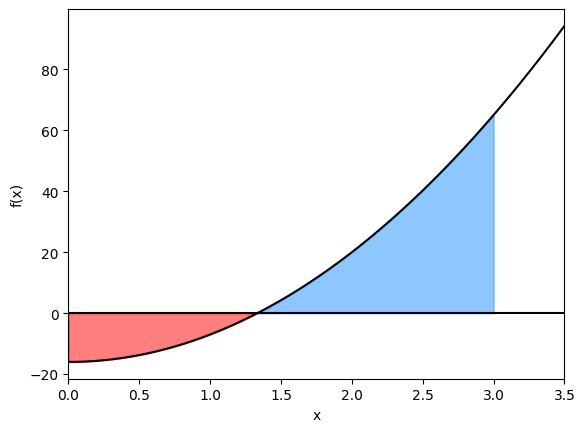

In [ ]:
##########################################
# Plot flow rates at beginning of 2023.
##########################################
x_in = np.linspace(0, 3.5, 1000)  # pick 1000 evenly spaced x-values from x=0 to x=3
plt.plot(x_in,  # plot a point at each x-value in array x
         9 * x_in**2 - 16,  # corresponding output 3x^2 - 4
         color ='black')  # plot curve in blue

###################
# Add axes to plot
###################
plt.axhline(y=0, color='black')  # add a vertical axis at y=0

####################
# Shade exact area
####################
x_fill1 = np.linspace(0, 4/3, 1000)
plt.fill_between(x_fill1, 9 * x_fill1**2 - 16, color='red', alpha=0.5)

x_fill2 = np.linspace(4/3, 3, 1000)
plt.fill_between(x_fill2, 9 * x_fill2**2 - 16, color='dodgerblue', alpha=0.5)

###############
# Plot options
###############
plt.xlabel('x')  # label on the x-axis
plt.ylabel('f(x)')  # label on the y-axis
plt.xticks(np.arange(0, 4, step=0.5))  # Set tick marks
plt.xlim(0, 3.5)  # set limits on x-axis

# Display the plot
plt.show()

## Question 1a

---

Use the SymPy function `.solve()` to find the exact value of $x$ where the graph of $f(x)=9x^2-16$ intersects the $x$-axis. Then type your answer in the text cell below the code cell.

<br>  

*Note: Code to define `x` as a symbolic variable and `f` as a symbolic function is included in case you have not run the previous code cell where `x` and `f` are defined.*

In [ ]:
##########################
# Solution to Question 1a
##########################
x = sym.symbols('x')  # define x as a symbolic variable
f = 9 * x**2 - 16  # define symbolic function f(x) = 9x^2 - 16

sym.solve(??)  # replace ?? to complete the command

### Solution to Question 1a

---

The $x$-intercept is located at ( <mark>??</mark> , 0).

<br>  

*Note: Enter the exact value of $x$ and not a decimal approximation.*


<br>  
<br>  


## Question 1b

---

Use the SymPy function `integrate()` to calculate the area of the shaded region **above** the $x$-axis.



In [ ]:
##################################################
# Solution to Question 1b
# Replace ?? with a command using the integrate()
# function to compute the area.
##################################################
area_above = ??  # area of shaded region above x-axis

area_above  # print area above x-axis to screen

## Question 1c

---

Use the SymPy function `integrate()` to calculate the area of the shaded region **below** the $x$-axis.

<br>  

*Hint: Areas are positive values. You may need to adjust your code (multiply by $-1$ for example) so the value stored in `area_below` is positive.*

In [ ]:
###################################################
# Solution to Question 1c
# Replace ?? with a command using the integrate()
# function to compute the area.
###################################################
area_below = ??  # area of shaded region below x-axis

area_below  # print area below x-axis to screen

## Question 1d

---


Complete the code cell below to use the areas stored in `area_above` and `area_below` to verify

$$\int_0^3 \left( 9x^2 - 16 \right) \, dx = 33.$$


<br>  

*Hint: The definite integral $\displaystyle \int_a^b f(x) \, dx$ is the sum of the areas above the $x$-axis, counted positively, and the areas below the $x$-axis, counted negatively.*

In [ ]:
######################################################
# Solution to Question 1d
# Replace ?? with an operation such as +, -, *, or /.
######################################################
integral_value = area_above ?? area_below  # compute value of definite integral

integral_value  # print value of definite integral

<a name="q2"></a>
# Question 2

---

You leave your home to go for a bike ride on a straight bike path to meet a friend at a lake, and then you both ride along another straight bike path to your friend's home. Your velocity $v(t)$, in km/hour, $t$ hours after leaving your home, is modeled by the formula

$$v(t) = 1000 t^3 - 1133 t^2 + 267 t,$$

where positive velocities take you toward the lake and negative velocities take you away from the lake. Run the code cell below to generate a plot of your velocity over the course of your bike ride and answer the questions that follow.


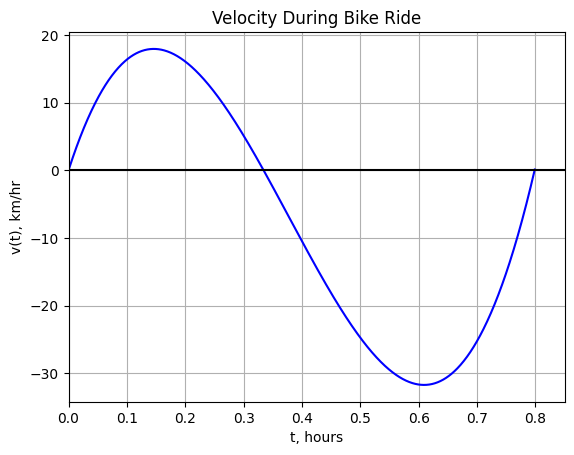

In [ ]:
####################################
# Plot of velocity during bike ride
####################################
t_in = np.linspace(0, 0.799, 1000)  # values of t where v(t) plotted
r_out = 1000 * t_in**3 - 1133 * t_in**2 + 267 * t_in  # velocities
plt.plot(t_in,  # plot a point at each t value in array t_in
         r_out,  # corresponding velocity v(t)
         color ='blue')  # plot curve in blue

###################
# Add axes to plot
###################
plt.axhline(y=0, color='black') # add a vertical axis at y=0

###############
# Plot options
###############
plt.title('Velocity During Bike Ride')
plt.xlabel('t, hours')  # label on x-axis
plt.ylabel('v(t), km/hr')  # label for the y-axis
plt.xticks(np.arange(0, .9, step=0.1))  # Set tick marks
plt.xlim(0, 0.85)  # set limits on x-axis
plt.grid(True)  # add grid

# Display the plot
plt.show()

<a name="q2a"></a>
## Question 2a

---

Complete the code cell below to find the values of $t$ when your velocity is 0 km/hr.

In [ ]:
#######################################################
# Solution to Question 2a
# Replace ?? with command using to find when v(t) = 0.
#######################################################
t = sym.symbols('t')  # define t as a symbolic variable
v = 1000. * t**3 - 1133.  * t**2 + 267. * t  # define symbolic function v(t)

??  # find when v(t) = 0

<a name="q2b"></a>
## Question 2b

---

Use the output from the code in [Question 2a](#q2a) to complete the code cell below to give the time in minutes that it takes you to reach the lake and to reach your friend's home.

In [ ]:
##########################
# Solution to Question 2b
##########################
lake_min = ??  # compute the number of minutes it takes to reach the lake
friend_min = ??  # compute the number of minutes it takes to reach your friend's home

print("It takes ", lake_min, " minutes for you to reach the lake.")
print("It takes ", friend_min, " minutes for you reach your friend's home.")

<a name="q2c"></a>
## Question 2c

---

Set up a definite integral that gives the distance of your home from the lake. Then use the `integrate` function to compute the value of the definite integral in the code cell below. After running the code, type your answer in the text cell below the code cell.


In [ ]:
################################################################
# Solution to Question 2c
# Replace the ?? with a command using the integrate() function.
################################################################
your_dist_to_lake = ??  # your distance to the lake

your_dist_to_lake  # print distance to screen

### Solution to Question 2c

---


The distance of your home to the lake is <mark>[round to three decimal places]</mark> km.



<br>  
<br>  

<a name="q2d"></a>
## Question 2d

---

Set up a definite integral that gives the distance of your friend's home from the lake. Then use the `integrate` function to compute the value of the definite integral in the code cell below. After running the code, type your answer in the text cell below the code cell.


In [ ]:
################################################################
# Solution to Question 2d
# Replace the ?? with a command using the integrate() function.
################################################################
friend_dist_to_lake = ??  # friend's distance to the lake

friend_dist_to_lake  # print distance to screen

### Solution to Question 2d

---


The distance of your friend's home to the lake is <mark>[round to three decimal places]</mark> km.



<br>  
<br>  


# Evaluating Indefinite Integrals with `integrate()`.

---


We can similarly use the `integrate()` function to evaluate an *indefinite integral*

$$\int f(x) \, dx.$$

In this case, we no longer have limits of integration. After we define the symbolic variable `x` and function `f`, we can use either the command `f.integrate(x)` or `sym.integrate(f, x)` to evaluate an indefinite integral.


## Interpreting the Output of an Indefinite Integral

---

The indefinite integral $\displaystyle \int f(x) \, dx$ is a family of functions $F(x)$ such that $F'(x) = f(x)$.

<a name="q3"></a>
# Question 3

---

Use the SymPy function `integrate()` to evaluate the integral

$$\int \left( 9x^2 - 16 \right) \, dx.$$


In [ ]:
##################################
# Solution to Question 3
##################################
x = sym.symbols('x')  # define x as a symbolic variable
f = 9 * x**2 - 16  # define symbolic function f(x) = 9x^2 - 16

??  # enter a command using integrate() to evaluate the integral

<a name="q4"></a>
# Question 4

---

Based on the solution to [Question 3](#q3), you should see that $F(x) = 3x^3 - 16x$ is one possible antiderivative of $f(x) = 9x^2 - 16$. Complete the code cell below to use the `diff()` function to verify $F(x) = 3x^3 - 16x$ is an antiderivative of $f(x) = 9x^2 - 16$.

<br>  

*Hint: We say $F(x)$ is an antiderivative of $f(x)$ if $F'(x) = f(x)$.*


In [ ]:
#########################
# Solution to Question 4
#########################
F = ??  # define F(x) = 3x^3 - 16x as a symbolic function of x
??  # enter a command using diff() to show F is an antiderivative of f

<a name="q5"></a>
# Question 5

---

The output from [Question 3](#q3) is very helpful, but it is not quite the correct result for $\displaystyle \int \left( 9x^2 - 16 \right) \, dx$. Enter the correct answer by completing the solution in the text box below.


## Solution to Question 5

---

Replace the ?? in the equation below to complete the solution.


$$\int \left( 9x^2 - 16 \right) \, dx = 3x^3 - 16x + ?? $$


<br>  
<br>  

<a name="q6"></a>
# Question 6

---

Use the SymPy function `integrate()` to evaluate the integral

$$\int \left( 5e^z + 3 \sin{z} \right) \, dz.$$

Based on the output of the code cell, type your answer in the text cell below the code cell.

<br>  

*Hint: Use the `sym.exp()` and `sym.sin()` functions to define and store the integrand to `g`. You can check your answer by inserting a code cell and using the `diff()` function as done in [Question 3](#q3).*


In [ ]:
#################################################################
# Solution to Question 6
# Replace each ?? to complete the code to evaluate the integral.
#################################################################
z = sym.symbols('z')  # define z as a symbolic variable
g = ??  # define symbolic function g(z) = 5e^z + 3sin(z)

??  # enter a command using integrate() to evaluate the integral

## Solution to Question 6

---

We have $\displaystyle \int \left( 5e^z + 3 \sin{z} \right) \, dz = $ <mark>[Type formula here]</mark> .


<br>  
<br>  

<a name="save-before"></a>
# Be Sure You Have Saved Your Work!
---

This lab is a shared Colab notebook available for anyone to view. However, since everyone is sharing this notebook, you do not have permission to save changes to this shared Colab notebook. In order to save your work:

1. You will need to set up a free Google Drive account. If you already have a Google Drive account, you are ready to go!
2. Click the `Copy to Drive` button to the right of the `+ Code` and `+ Text` buttons on top of the notebook.
3. Select from the menu `File/Save a Copy in Drive`.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your Drive.
  - Feel free to rename and store the notebook wherever you like.


# Code Summary

---


## Evaluating Definite Integrals Symbolically

---

In [ ]:
# load simpy and declare x to be a symbolic varibale
import sympy as sym
x = sym.symbols('x')

# function to integrate and endpoints
f = sym.sin(2*x) + sym.cos(3*x)
a = 0
b = 5

# Calculate the integral of f, with respect to x, from x=a to x=b
f.integrate((x, a, b))

# alternate notation
# sym.integrate(f,(x,a,b))


# to get a decimal approximation, use float()
# float(f.integrate((x, a, b)))

Run the code cell below to display the signed area that the above integral corresponds to.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define function to integrate
def f(x):
  return np.sin(2*x) + np.cos(3*x)

# define endpoints
a = 0
b = 5

# plot
x_values = np.linspace(a, b, 200)
f_values = f(x_values)
plt.plot(x_values, f_values)
plt.fill_between(x_values, f_values, where=(x_values >= a) & (x_values <= b), alpha=0.3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) with Shaded Area Corresponding to the Integral')
plt.xlim([a-0.5, b+0.5])
plt.grid(True)
plt.show()


## Evaluating Indefinite Integrals Symbolically

---

In [ ]:
# load simpy and declare x to be a symbolic varibale
import sympy as sym
x = sym.symbols('x')

# function to integrate
f = sym.cos(2*x) + 1/(1+x**2)

# Calculate the indefinite integral of f with respect to x
f.integrate(x)

# alternate notation
# sym.integrate(f,x)


Note that one does not need to integrate with respect to $x$. One can use any variable!


In [ ]:
# load simpy and declare x to be a symbolic varibale
import sympy as sym
r = sym.symbols('r')

# function to integrate
f = sym.cos(2*r) + 1/(1+r**2)

# Calculate the indefinite integral of f with respect to r
f.integrate(r)

# alternate notation
# sym.integrate(f,r)
